In [18]:
import pandas as pd

orders_url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
orderlines_url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
products_url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
brands_url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"

def import_csv(url):
  path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
  return pd.read_csv(path)

orderlines_cl = import_csv(orderlines_url)
orders_cl = import_csv(orders_url)
product_cl = import_csv(products_url)
brands_df = import_csv(brands_url)

#### Exercise 1: Convert `orderlines_cl['date']` and `orders_cl['created_date']` to the correct data types

In [19]:
orders_cl['created_date'] = pd.to_datetime(orders_cl['created_date'])
orderlines_cl['date'] = pd.to_datetime(orderlines_cl['date'])

##### Hint:

`pd.to_datetime()`

#### Exercise 2: Create a new column in the orderlines table with the day of the week (e.g. "Wednesday")

In [20]:
orderlines_cl['dow'] = pd.to_datetime(orderlines_cl['date']).dt.strftime("%A")

##### Hint:

`.dt.day_name()`

#### Exercise 3: How many orders were completed between Oct 4th 2017 and Jan 3rd 2018?

In [21]:
((orders_cl["state"] == 'Completed') & (orders_cl["created_date"].between('2017-10-04' , '2018-01-03 23:59:59'))).sum()

np.int64(16410)

##### Hint:

`.between('__-__-__', '__-__-__')`<br>
Don't forget to filter to just completed orders!

#### Exercise 4: Are there any orders in the orderlines data frame that aren't in the orders data frame? What about orders in the orders data frame that arent in the orderlines data frame?

In [37]:
ordermerge_df = orderlines_cl.merge(orders_cl,left_on='id_order', right_on='order_id',how='left')
print("There are {:d} rows in orderlines that have an order id that does not exist in orders.".format(ordermerge_df[ordermerge_df['order_id'].isna()]['id_order'].count()))
print("Those rows come from {:d} specific orders.".format(ordermerge_df[ordermerge_df['order_id'].isna()]['id_order'].nunique()))
ordermerge_df.loc[ordermerge_df['order_id'].isna(),'id_order'].unique()

There are 193 rows in orderlines that have an order id that does not exist in orders.
Those rows come from 144 specific orders.


array([295310, 296284, 297261, 298750, 297048, 296209, 297736, 292898,
       299294, 296334, 299140, 285883, 277108, 298871, 273648, 267053,
       293195, 299077, 298755, 299306, 298090, 297432, 293050, 298759,
       298768, 298131, 297824, 297922, 298777, 298613, 298078, 281551,
       299335, 293740, 298651, 293367, 285295, 277909, 284146, 269400,
       293194, 276301, 297562, 294638, 286899, 293298, 293133, 293099,
       297751, 296428, 259450, 288982, 293049, 293446, 295545, 249129,
       289942, 276208, 286774, 249234, 241355, 279900, 281968, 280637,
       285843, 289399, 279338, 267367, 287999, 295269, 271140, 296650,
       288246, 291348, 282369, 289952, 269062, 283528, 262867, 299416,
       289194, 290620, 266430, 287578, 263635, 291375, 278315, 252981,
       249730, 287125, 288351, 249894, 283549, 280129, 293160, 246532,
       294501, 273216, 269204, 296413, 260057, 298426, 270242, 251984,
       274520, 263232, 244053, 243781, 280083, 263021, 255175, 279302,
      

In [64]:
formorders=set(orders_cl['order_id'])
fromorderlines=set(orderlines_cl['id_order'])
difference = pd.Series(list((fromorderlines - formorders)))
print(f"Found {difference.count()} missing order")
difference


Found 144 missing order


0      245252
1      268299
2      280083
3      291348
4      274457
        ...  
139    296428
140    284146
141    264180
142    288246
143    293367
Length: 144, dtype: int64

In [ ]:
formorders=set(orders_cl['order_id'])
fromorderlines=set(orderlines_cl['id_order'])
pd.Series(list((fromorderlines - formorders))).count()

##### Hint:

Compare the unique order ids<br>
Consider using `set() - set()`

#### Exercise 5: Create a new column in the orders data frame with the total quantity of items in each order

In [71]:
orderline_prodcnts = orderlines_cl.groupby("id_order")["product_quantity"].sum()
orders_cl = orders_cl.merge(orderline_prodcnts, left_on='order_id', right_on='id_order')

##### Hint:

You'll have to do a `.groupby()` to aggregate the quantities in the orderlines data frame and then merge those aggregates into the orders data frame.

#### Bonus: Plot how the average quantity per order evolved weekly over the snapshot in the orders data frame. (Bonus: include only completed orders)

<Axes: xlabel='created_date'>

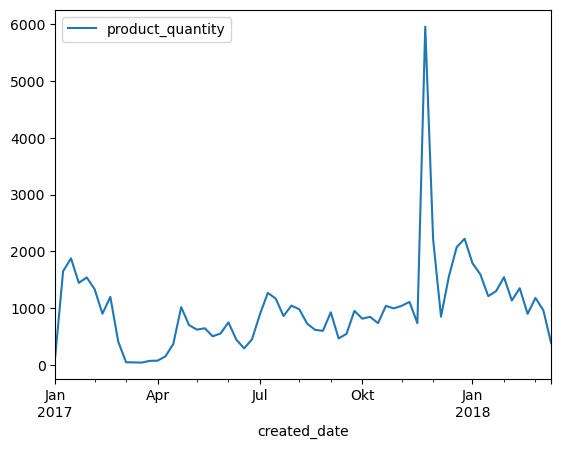

In [79]:
orders_cl.loc[orders_cl["state"] == "Completed"].resample("W", on="created_date").agg({"product_quantity":"sum"}).plot()

##### Hint:

Use resample with a weekly frequency string and average the new column you created in the previous exercise <br>
`.resample(__, on=____).agg({___:___}).plot()`